In [1]:
import sys
import pandas as pd
import sklearn

print("Python yolu:", sys.executable)
print("pandas:", pd.__version__)
print("sklearn:", sklearn.__version__)


Python yolu: D:\telco-churn-project\venv\Scripts\python.exe
pandas: 2.3.3
sklearn: 1.7.2


In [2]:
df = pd.read_excel("data/raw/Telco_customer_churn.xlsx")
print(df.shape)
df.head()


(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
target = "Churn Label"
leak = ["Churn Value", "Churn Score", "Churn Reason"]

X = df.drop(columns=leak + [target])
y = df[target]

print("X shape:", X.shape)
print("y dağılımı:")
print(y.value_counts())


X shape: (7043, 29)
y dağılımı:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


In [4]:
df["Total Charges"].dtype


dtype('O')

In [5]:
import numpy as np

df["Total Charges"] = pd.to_numeric(
    df["Total Charges"],
    errors="coerce"
)


In [6]:
df["Total Charges"].isna().sum()


np.int64(11)

In [7]:
median_total = df["Total Charges"].median()
df["Total Charges"].fillna(median_total, inplace=True)


C:\Users\F1\AppData\Local\Temp\ipykernel_16104\1227049374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(median_total, inplace=True)


In [8]:
df["Total Charges"] = df["Total Charges"].fillna(median_total)


In [9]:
df["Total Charges"].dtype
df["Total Charges"].isna().sum()


np.int64(0)

In [10]:
y = df["Churn Label"].map({"Yes": 1, "No": 0})


In [11]:
y.value_counts()


Churn Label
0    5174
1    1869
Name: count, dtype: int64

In [12]:
X = df.drop(columns=leak_cols)


NameError: name 'leak_cols' is not defined

In [13]:
leak_cols = [
    "Churn Label",
    "Churn Value",
    "Churn Score",
    "Churn Reason"
]


In [14]:
X = df.drop(columns=leak_cols)


In [15]:
X.shape
X.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'CLTV'],
      dtype='object')

In [16]:
y = df["Churn Label"].map({"Yes": 1, "No": 0})
y.value_counts()


Churn Label
0    5174
1    1869
Name: count, dtype: int64

In [17]:
drop_cols = [
    "CustomerID",  # ID, bilgi yok
    "Lat Long",    # string + redundant
    "Country",     # tek değer
    "State",       # tek değer
    "City",        # çok fazla unique
    "Zip Code"     # yüksek cardinality
]


In [18]:
X = X.drop(columns=drop_cols)


In [19]:
X.shape
X.columns


Index(['Count', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')

In [20]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_cols, cat_cols


(['Count',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Total Charges',
  'CLTV'],
 ['Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [22]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [23]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [24]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


In [25]:
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [26]:
model


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [30]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

ROC AUC: 0.8479449223694748


array([[915, 120],
       [158, 216]])

In [31]:
feature_names = model.named_steps["preprocess"].get_feature_names_out()


In [32]:
import pandas as pd
import numpy as np

coefs = model.named_steps["clf"].coef_[0]

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Abs_Coefficient": np.abs(coefs)
}).sort_values("Abs_Coefficient", ascending=False)

importance_df.head(15)


KeyError: 'clf'

In [33]:
model.named_steps


{'preprocess': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Count', 'Latitude', 'Longitude',
                                   'Tenure Months', 'Monthly Charges',
                                   'Total Charges', 'CLTV']),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['Gender', 'Senior Citizen', 'Partner',
                                   'Dependents', 'Phone Service',
                      

In [34]:
import pandas as pd
import numpy as np

# Feature isimleri
feature_names = model.named_steps["preprocess"].get_feature_names_out()

# Lojistik regresyon katsayıları
coefs = model.named_steps["classifier"].coef_[0]

# Önem tablosu
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Abs_Coefficient": np.abs(coefs)
}).sort_values("Abs_Coefficient", ascending=False)

importance_df.head(15)


,Feature,Coefficient,Abs_Coefficient
3,num__Tenure Months,-1.273255,1.273255
14,cat__Dependents_Yes,-0.983412,0.983412
43,cat__Contract_Two year,-0.744009,0.744009
13,cat__Dependents_No,0.640676,0.640676
20,cat__Internet Service_DSL,-0.612014,0.612014
41,cat__Contract_Month-to-month,0.567299,0.567299
21,cat__Internet Service_Fiber optic,0.557610,0.557610
5,num__Total Charges,0.514455,0.514455
4,num__Monthly Charges,-0.513712,0.513712
44,cat__Paperless Billing_No,-0.351499,0.351499


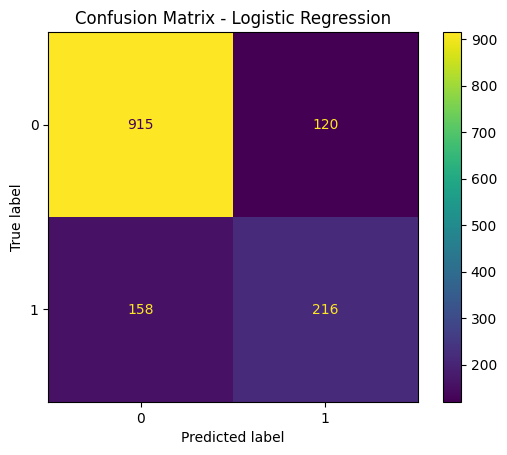

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    values_format="d"
)

plt.title("Confusion Matrix - Logistic Regression")
plt.show()


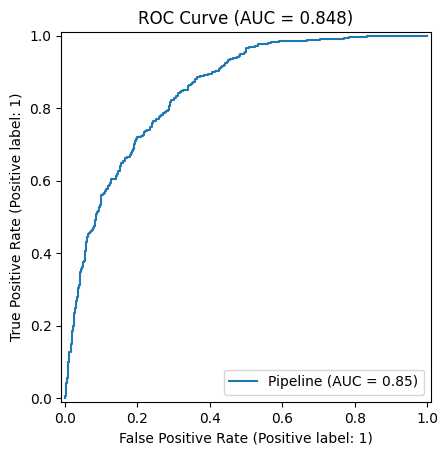

In [36]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test
)

plt.title("ROC Curve (AUC = {:.3f})".format(roc_auc_score(y_test, y_proba)))
plt.show()
